       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
There are a total of 149  null entries.
Gender               0
Married              0
Dependents           0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


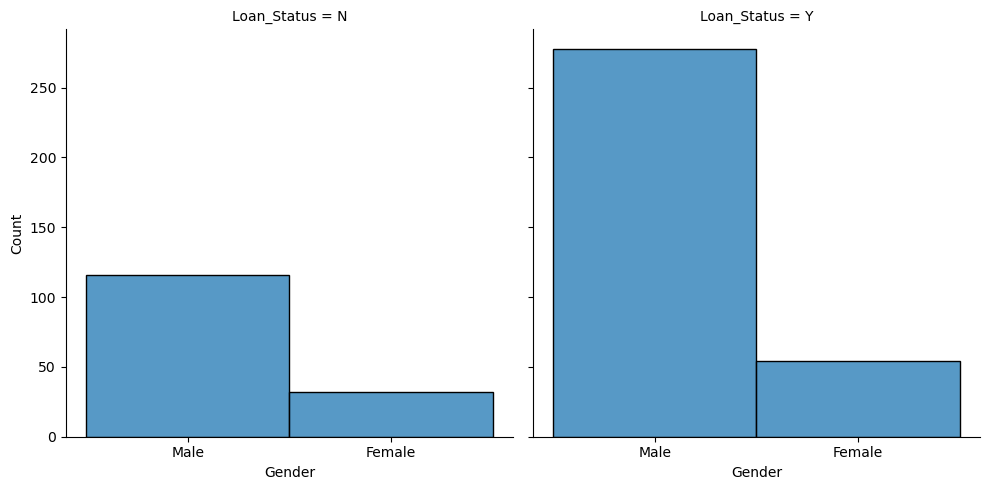

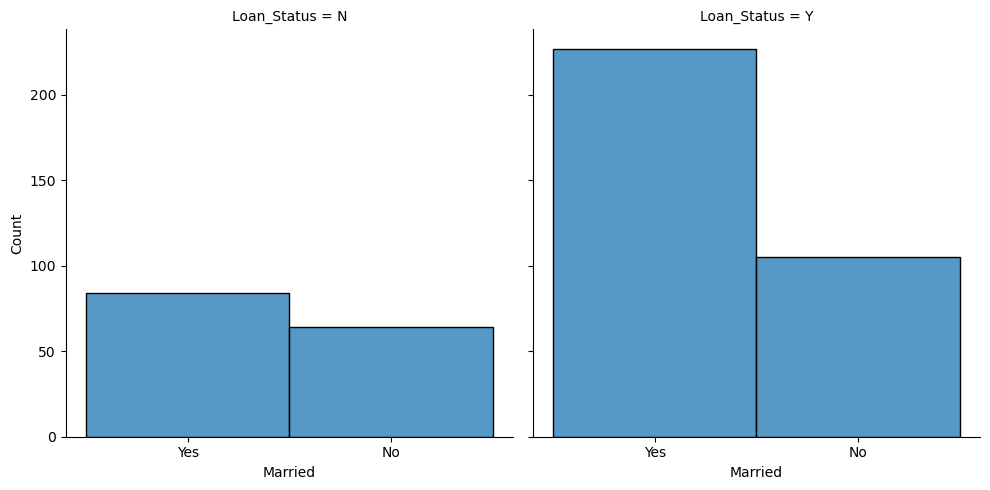

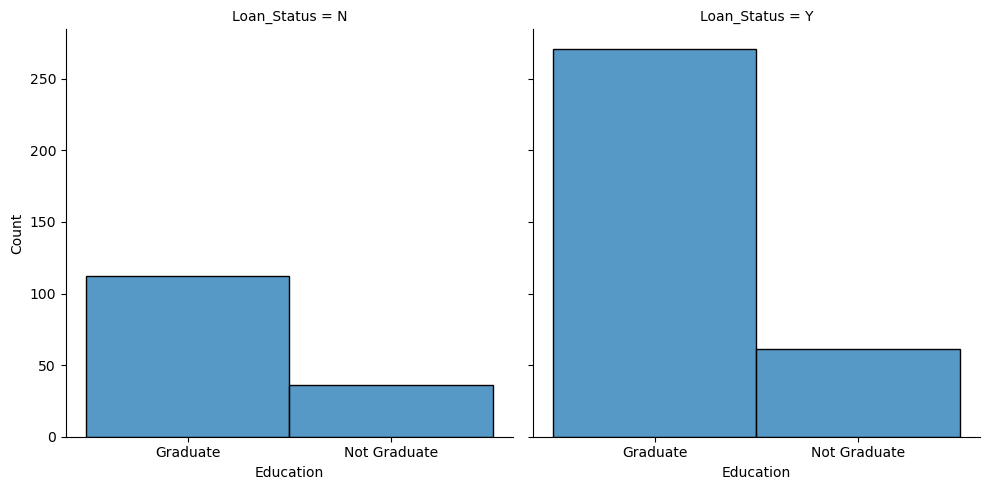

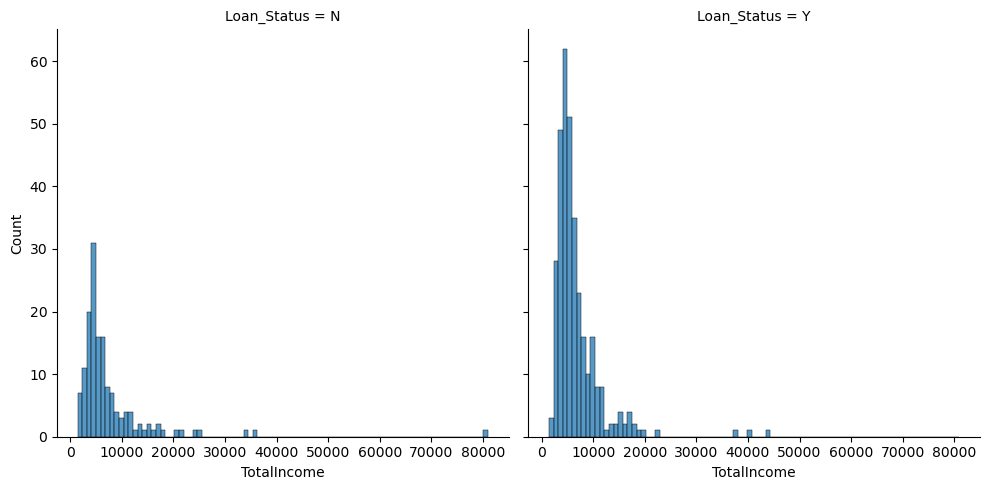

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

df = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
df = df.drop('Loan_ID', axis = 1)
print(df.describe())
print('There are a total of', df.isnull().sum().sum(), ' null entries.')
df2 = df.dropna()
print(df2.isnull().sum())

sns.displot(x=df2['Gender'], col = df2['Loan_Status'])
sns.displot(x=df2['Married'], col = df2['Loan_Status'])
sns.displot(x=df2['Education'], col = df2['Loan_Status'])
df2['TotalIncome'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
sns.displot(x = df2['TotalIncome'], col = df2['Loan_Status'])
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<AxesSubplot:xlabel='LoanAmount', ylabel='Property_Area'>

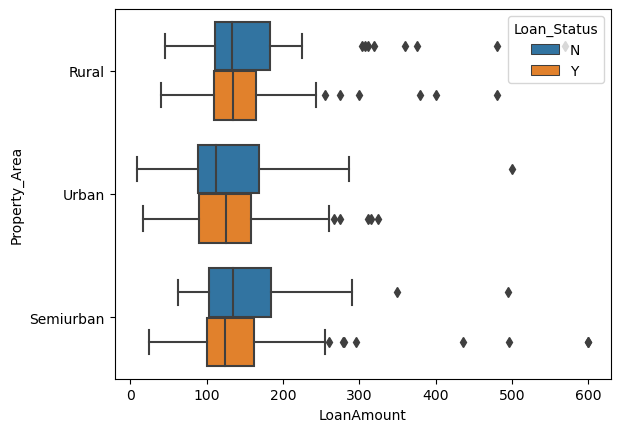

In [2]:
sns.boxplot(x = "LoanAmount", y = "Property_Area", hue = 'Loan_Status', data = df2)


In [3]:
X = df2.drop(['Loan_Status'], axis = 1)
X = pd.get_dummies(X, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Dependents'], 
               prefix = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Dependents'], drop_first = True)
y = df2['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
model = RandomForestClassifier(random_state = 910)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=910)

<BarContainer object of 15 artists>

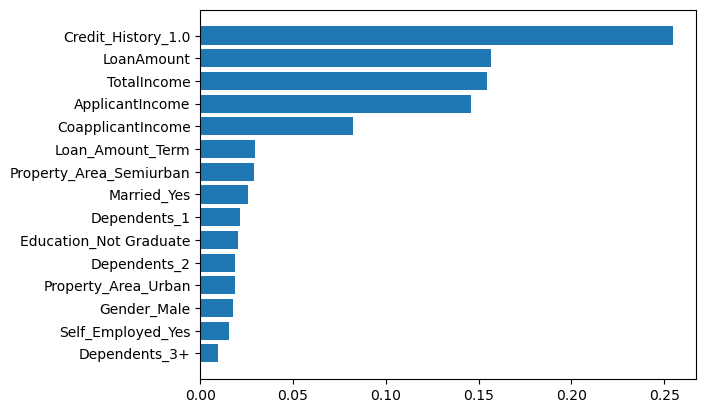

In [5]:
feature_importances = model.feature_importances_
featurebar = pd.DataFrame({'names':x_train.columns, 'importance':feature_importances})
featurebar = featurebar.sort_values(by = 'importance')
plt.barh(featurebar['names'], width = featurebar['importance'])

In [6]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred, y_test)

array([[14,  5],
       [17, 60]])

In [7]:
accuracy_score(y_pred, y_test)

0.7708333333333334

In [8]:
external_x_test = pd.read_csv("/kaggle/input/home-loan-approval/loan_sanction_test.csv").dropna().drop('Loan_ID', axis = 1)
external_x_test['TotalIncome'] = external_x_test['ApplicantIncome'] + external_x_test['CoapplicantIncome']
external_x_test = pd.get_dummies(external_x_test, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Dependents'], 
               prefix = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Dependents'], drop_first = True)
final_predictions = model.predict(external_x_test)
final_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N